https://www.kaggle.com/shivam2503/diamonds

## Table of Contents:

* [1.Importing and data description](#1)
* [2.Preparing Data](#2)
    * [2.1 Missing Values](#2.1)
    * [2.2 Duplicates](#2.2)
    * [2.3 Data Distribution](#2.3)
    * [2.4 Categorical Data Visualization](#2.4)
    * [2.5 Encode Categorical Data](#2.5)
* [3.Regression Models](#3)
    * [3.1 KNN Regressor](#3.1)
    * [3.2 Linear Regression](#3.2)
        * [3.2.1 Regression without z-y outliers](#321)
        * [3.2.2 Regression without z-y outliers and depth](#322)
    * [3.3. Polynomial Regression](#poly)
    * [SGD Regressor]
    * [Support Vector Regression]
    * [Decision Tree Regression]
    * [Random Forest Regression]

<a id = 1></a>
# 1. Importing and data description

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (11,7)
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diamonds.csv', index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


- **Price** in USD, 
- **carat** - the weight of the diamond ```from 0.2 to 5.01```, 
- **cut** is a quality of the cut ```(Fair, Good, Very Good, Premium, Ideal)```, 
- **color** - diamond colour, ```from J (worst) to D (best)```, 
- **clarity** - 
a measurement of how clear the diamond is ```(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))```, 
- **x** - length in mm ```(0-10.74)```, 
- **y** - width in mm ```(0-58.9)```, 
- **z** - depth in mm ```(0-31.8)```, 
- **depth** - total depth percentage: ```z / mean(x, y) = 2 * z / (x + y), (43-79)```,$\frac{z}{y}*100$, I suppose,
- **table** - width of top of diamond relative to widest point ```(43-95)```.

<a id =2></a>
# 2. Cleaning Dataset

In [4]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

<a id = 2.1></a>
## 2.1 Missing Values

In [6]:
# Missing values in each column:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

print(df.isnull().sum())

carat - 0.0%
cut - 0.0%
color - 0.0%
clarity - 0.0%
depth - 0.0%
table - 0.0%
price - 0.0%
x - 0.0%
y - 0.0%
z - 0.0%


But still, there is missing data: minimum value of ```x```, ```y``` and ```z``` is zero. 

In [18]:
df[(df.x==0.0) | (df.y==0.0) | (df.z==0.0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


It's only 19 rows here, whereas the dataset has 53794 rows. So these 19 can be painlessly removed. The depth is not always equal to $\frac{z}{y}*100$ here. 

In [3]:
df = df[(df.x!=0.0) & (df.y!=0.0) & (df.z!=0.0)]

<a id = 2.2></a>
## 2.2 Duplicates

In [4]:
print('duplicated:' ,df.duplicated().sum())
print('\n isNull: \n', df.isnull().sum())

duplicated: 145

 isNull: 
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [5]:
df.drop_duplicates(inplace=True)

<a id = 2.3></a>
## 2.3 Data distribution

In [5]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53775.000000,53775,53775,53775,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21485,11254,13030,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797536,NaN,NaN,NaN,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,NaN,NaN,NaN,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000


In [7]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027889,0.181113,0.921548,0.977857,0.953980,0.961030
depth,0.027889,1.000000,-0.297580,-0.011144,-0.025224,-0.029262,0.094678
table,0.181113,-0.297580,1.000000,0.126666,0.195451,0.183814,0.151683
price,0.921548,-0.011144,0.126666,1.000000,0.887137,0.867685,0.868030
x,0.977857,-0.025224,0.195451,0.887137,1.000000,0.974822,0.975382
y,0.953980,-0.029262,0.183814,0.867685,0.974822,1.000000,0.956623
z,0.961030,0.094678,0.151683,0.868030,0.975382,0.956623,1.000000


Price does not depend on the depth and table, which is pretty much obvious.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005811C18>,
      dtype=object)

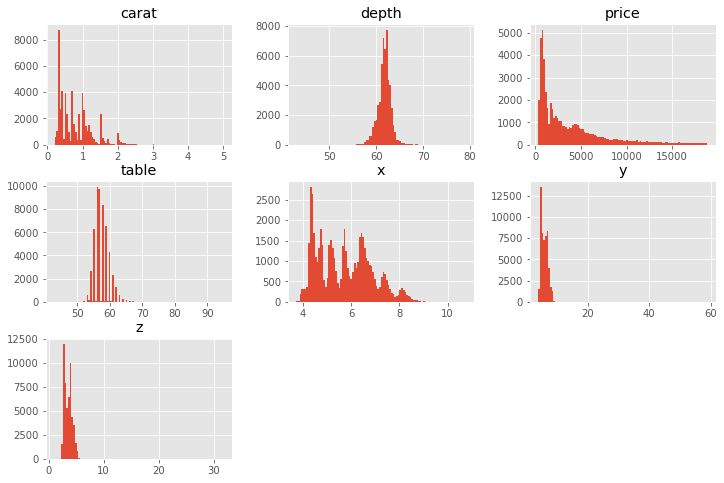

In [13]:
df.hist(bins=100)

In [173]:
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

# b=25
# for row, row_axes in enumerate(axes):
#     for column, ax in enumerate(row_axes):
#         ax.hist(df.carat, bins=b)
#         ax.set_title('Bins = {}'.format(b))
#         b+=15

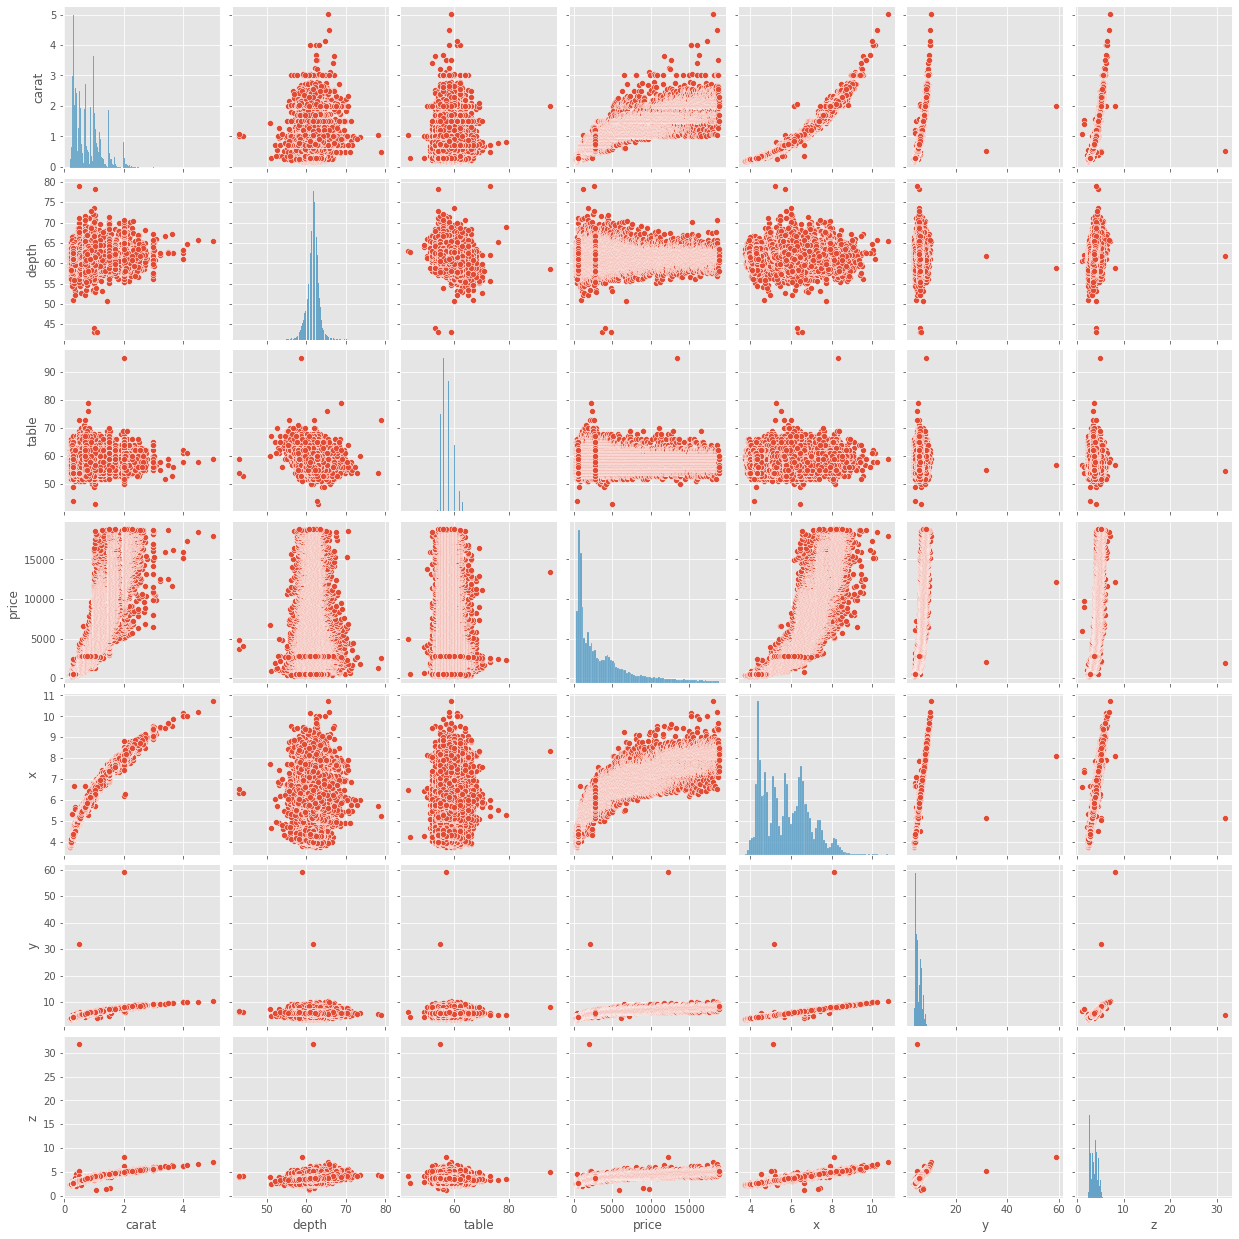

In [31]:
sns.pairplot(df)

```y``` and ```z``` have some significant outliers. Keep it in mind.

<a id=2.4></a>
## 2.4 Categorical Data Visualization

**Cut** is the most important characteristic after carat (weight).

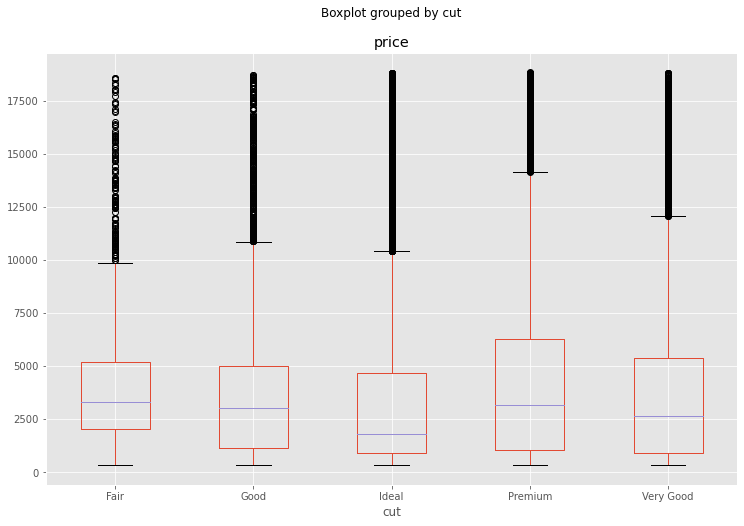

In [185]:
df.boxplot(column='price', by='cut')

```Premium``` has the highest 3rd quartile.

The number of ```ideal``` is more than the number of ```premium```:

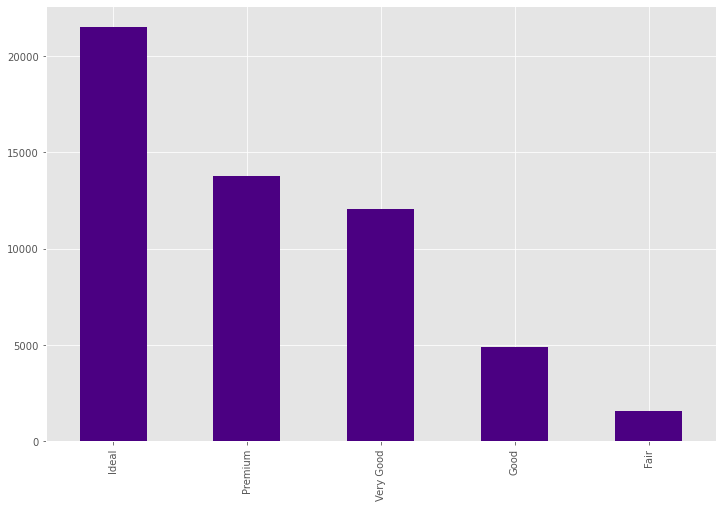

In [186]:
df.cut.value_counts().plot.bar(color = 'indigo')

**Color** is the second crucial characteristic.

```D - the best, J - the worst```

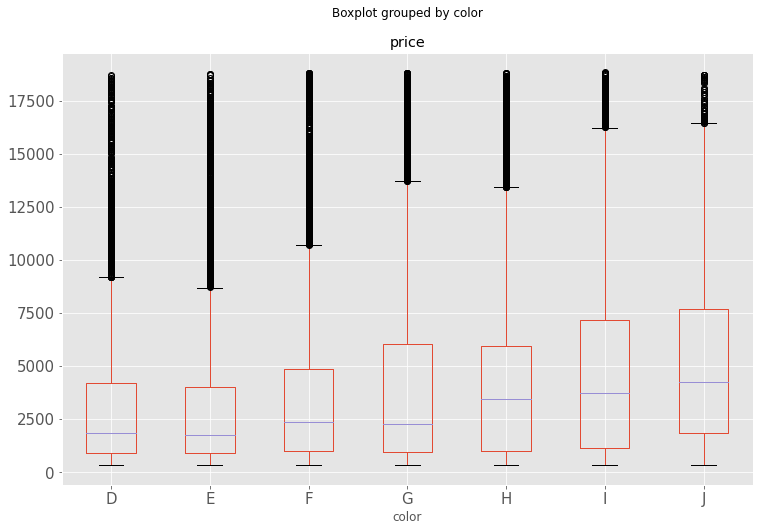

In [187]:
df.boxplot(column='price', by='color', fontsize=15)

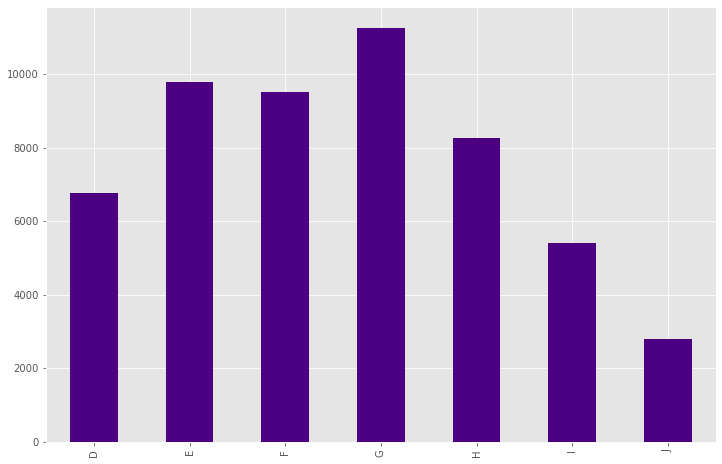

In [96]:
df.color.value_counts().sort_index(ascending=True).plot.bar(color = 'indigo')

```Color``` is pretty much normally distributed.

The highest 3rd quartile price has a diamond with the worst color.

**Clarity**

```I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)```

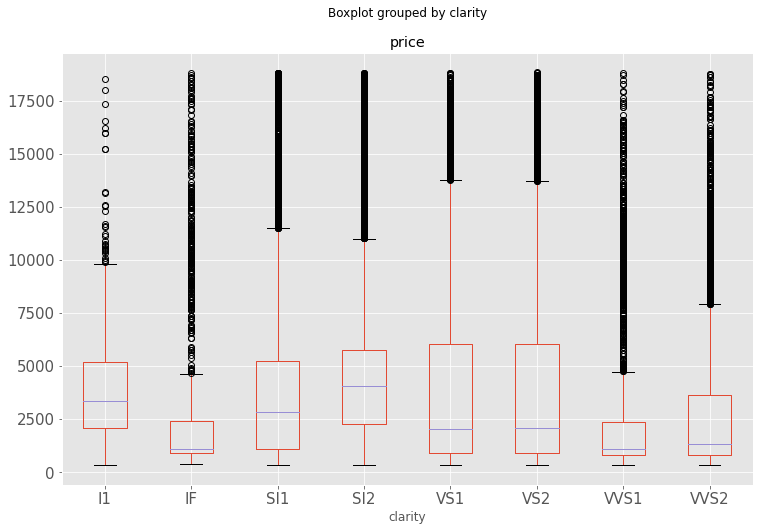

In [188]:
df.boxplot(column='price', by='clarity', fontsize=15)

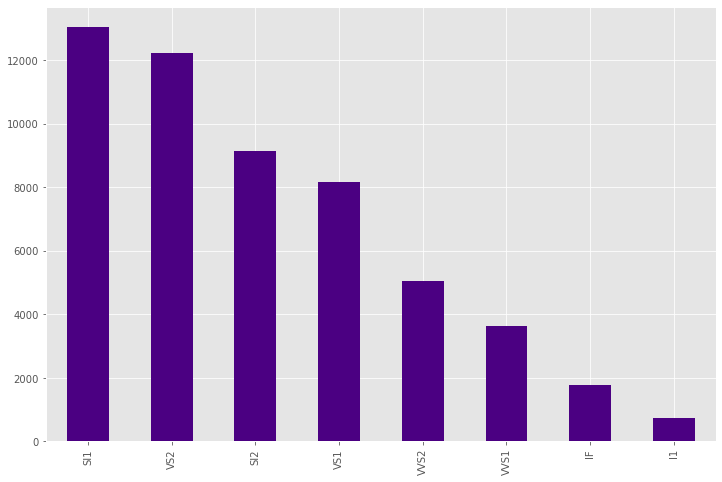

In [12]:
df.clarity.value_counts().plot.bar(color = 'indigo')

Seems like ```clarity``` is also normally distributed.

- **Cut.** Premium has the highest 3rd quartile. It can be related to the size and clarity of the diamond. Hence, premium diamond distribution is closer to normal or, better to say, they are both approx-ly log-normal distributed, but the premium one has a less  𝜎  parameter.
- **Color.** The highest 3rd quartile price has a diamond with the worst color. Taking into account its small amount, we can say that a bad color is found in diamonds of different price categories.
- **Clarity** A "perfect" box has the smallest 3rd quartile price. It can be connected with the fact that big diamonds (those that are more expensive usually) have bad clarity and even some defects. 
- **Carat** Obviously, plays one of the biggest role in price definition (check out the pairplot).
- **The median** of each feature and class is low, whereas, the maximum price is significantly higher and there are outliers. In other words no matter what or cut is, there is also an expensive sample, probably with a big weight.

<a id = 2.5></a>
## 2.5 Encoding Categorical Features

In [15]:
# df['cut'] = df['cut'].cat.codes  #alphabetically labeled from 0 to num_categories-1

They are all ordinal features as they have some order associated with them.

Change ```cut```, ```color``` and ```clarity``` to float values starting from 1.0 as the worst one. The number of categories is low, so it is very easy:

In [6]:
print('cut: ', df.cut.unique())
print('colors: ', df.color.unique())
print('clarity: ', df.clarity.unique())

cut:  ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
colors:  ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity:  ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [7]:
# The greater the number, the higher quality diamond has
cut_d = {'Ideal': 5., 'Premium': 4., 'Good': 3., 'Very Good': 2., 'Fair': 1.}
color_d = {'D': 7., 'E': 6., 'F': 5., 'G':4., 'H':3., 'I': 2., 'J': 1.}
# clarity_d = {'I1': 1, 'SI2': 2, 'SI1':3 , 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
clarity_d = {"I3": 1., "I2": 2., "I1": 3., "SI2": 4., "SI1": 5., "VS2": 6., "VS1": 7., "VVS2": 8., "VVS1": 9., "IF": 10., "FL": 11.}

df.cut = df.cut.map(cut_d)
df.color  = df.color.map(color_d)
df.clarity = df.clarity.map(clarity_d)

In [8]:
df['cut'] = df['cut'].astype('category')
df['color'] = df['color'].astype('category')
df['clarity'] = df['clarity'].astype('category')

<a id = 3></a>
# 3. Regression Models

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

In [10]:
results={} # to store rmse and R^2 here

"Here the fit method, when applied to the training dataset,learns the model parameters (for example, mean and standard deviation). We then need to apply the transform method on the training dataset to get the transformed (scaled) training dataset. We could also perform both of this steps in one step by applying fit_transform on the training dataset.

Then why do we need 2 separate methods - fit and transform ?

In practice we need to have a separate training and testing dataset and that is where having a separate fit and transform method helps. We apply fit on the training dataset and use the transform method on both - the training dataset and the test dataset. Thus the training as well as the test dataset are then transformed(scaled) using the model parameters that were learnt on applying the fit method the training dataset.""

In [49]:
def splitting(data):  
    X = data.drop('price', axis=1)
    y = data['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    scaler = StandardScaler()
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return(X, y, X_train, X_test, y_train, y_test)

<a id = 3.1></a>
## 3.1 KNN Regressor

In [50]:
knn_df = df.copy()

In [51]:
def knn_reg(data):
    
    X, y, X_train, X_test, y_train, y_test = splitting(data)

    rmse_values = [] # to store rmse values for different k
    for K in range(9):
        K = K+1
        model = KNeighborsRegressor(n_neighbors = K)

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        error = sqrt(mean_squared_error(y_test, pred))
        rmse_values.append(error)
        print('RMSE value for k=' , K , 'is:', round(error,2))
        print('R^2 on trainig set: ', model.score(X_train, y_train))
        print('R^2 on test set: ', model.score(X_test, y_test), '\n')
    #     round(model.score(X_test, y_test)*100, 2)
    
    curve = pd.DataFrame(rmse_values) # elbow curve 
    curve.plot()

RMSE value for k= 1 is: 875.73
R^2 on trainig set:  0.9999936575001439
R^2 on test set:  0.9524594812448948 

RMSE value for k= 2 is: 769.05
R^2 on trainig set:  0.9881143067837638
R^2 on test set:  0.963337203351451 

RMSE value for k= 3 is: 740.8
R^2 on trainig set:  0.9835726732245654
R^2 on test set:  0.9659812107549864 

RMSE value for k= 4 is: 730.63
R^2 on trainig set:  0.980597071512486
R^2 on test set:  0.9669088998280609 

RMSE value for k= 5 is: 724.44
R^2 on trainig set:  0.9787433985016295
R^2 on test set:  0.9674671303400452 

RMSE value for k= 6 is: 720.12
R^2 on trainig set:  0.9772556532881104
R^2 on test set:  0.9678535637586237 

RMSE value for k= 7 is: 717.85
R^2 on trainig set:  0.9760824821269196
R^2 on test set:  0.9680563890220417 

RMSE value for k= 8 is: 717.73
R^2 on trainig set:  0.9752817125534639
R^2 on test set:  0.9680666312745447 

RMSE value for k= 9 is: 721.65
R^2 on trainig set:  0.974648996309272
R^2 on test set:  0.9677168765203815 



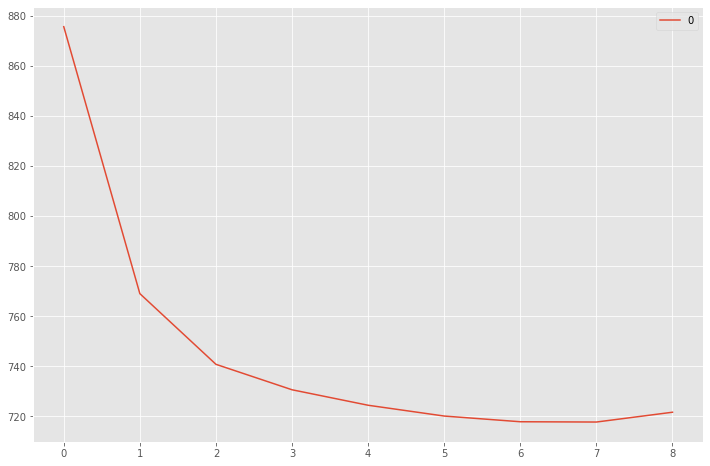

In [52]:
knn_reg(knn_df)

In [53]:
results['KNN'] = [717.85, 0.97]

<a id=3.2></a>
## 3.2 Linear Regression

In [53]:
linreg_df = df.copy()

X_lin, y_lin, X_train_lin, X_test_lin, y_train_lin, y_test_lin = splitting(linreg_df)

In [ ]:
model_lin = LinearRegression().fit(X_train_lin, y_train_lin)
error_lin = sqrt(mean_squared_error(y_test_lin, model_lin.predict(X_test_lin)))

In [84]:
def estimate(error, model, X_train, X_test, y_train, y_test):
    print('RMSE' , error_lin)
    print('R^2 on trainig set: ', model.score(X_train, y_train))
    print('R^2 on test set: ', model.score(X_test, y_test), '\n')

In [85]:
estimate(error_lin, model_lin, X_train_lin, X_test_lin, y_train_lin, y_test_lin)

RMSE 1221.0388161844712
R^2 on trainig set:  0.9066842001885065
R^2 on test set:  0.9075772628174121 



In [55]:
# Table with predictors and coefficients
def coef_table(X, model):
    return pd.DataFrame(zip(['interception'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()), 
                    columns=['variable', 'coef'])

In [56]:
coef_table(X_lin, model_lin)

,variable,coef
0,interception,3933.058317
1,carat,5171.498914
2,cut,93.354016
3,color,553.639681
4,clarity,829.314410
5,depth,-140.075641
6,table,-90.360442
7,x,-1036.928104
8,y,46.002724
9,z,-56.469094


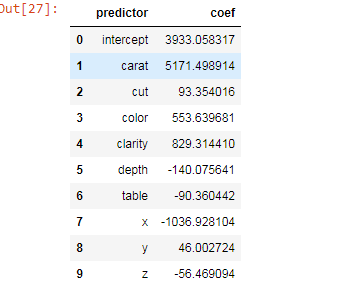

According to this model, 1 carat costs 5171 dollars, which seems to be true. What does the interception coefficint mean? If all parameters equal, we have to pay 3933 dollars. Apparently, it includes all the expenses: transportation, work, store markup etc. But still, it's too much. And that's why we have negative xz values.

In [66]:
# p-value for each coeff
def pval_table(X, y, model):
    coef = coef_table(X, model)
    
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    X1 = X1.astype(float)

    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [67]:
pval_table(X_lin, y_lin, model_lin)

,variable,coef,pvalue
0,interception,3933.058317,0.179371
1,carat,5171.498914,0.000000
2,cut,93.354016,0.004961
3,color,553.639681,0.000000
4,clarity,829.314410,0.000000
5,depth,-140.075641,0.000032
6,table,-90.360442,0.000005
7,x,-1036.928104,0.000082
8,y,46.002724,0.753393
9,z,-56.469094,0.843235


Let's try to remove outliers and take a look at the ```depth``` variable.

In [24]:
X.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.027889,0.181113,0.977857,0.953980,0.961030
depth,0.027889,1.000000,-0.297580,-0.025224,-0.029262,0.094678
table,0.181113,-0.297580,1.000000,0.195451,0.183814,0.151683
x,0.977857,-0.025224,0.195451,1.000000,0.974822,0.975382
y,0.953980,-0.029262,0.183814,0.974822,1.000000,0.956623
z,0.961030,0.094678,0.151683,0.975382,0.956623,1.000000


<a id = 321></a>
### 3.2.1 Regression without z-y outliers

In [69]:
linreg_df[(linreg_df['y'] > 30) | (linreg_df['z'] > 30)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,4.0,3.0,4.0,58.9,57.0,12210,8.09,58.90,8.06
48411,0.51,2.0,6.0,7.0,61.8,54.7,1970,5.12,5.15,31.80
49190,0.51,5.0,6.0,7.0,61.8,55.0,2075,5.15,31.80,5.12


Having ```z = 31.8``` with a low ```y```, a diamond should have a very big ```depth``` value. And having a high ```y``` value with the low ```z```, a diamong should have a low ```depth```. So: 

In [70]:
linreg_df2 = linreg_df.copy()
linreg_df2 = linreg_df2[(linreg_df2['y'] < 30) & (linreg_df2['z']<30)]

The same model for this new dataset:

In [71]:
X_lin2, y_lin2, X_train_lin2, X_test_lin2, y_train_lin2, y_test_lin2 = splitting(linreg_df2)

In [72]:
model_lin2 = LinearRegression().fit(X_train_lin2, y_train_lin2)
error_lin2 = sqrt(mean_squared_error(y_test_lin2, model_lin2.predict(X_test_lin2)))

estimate(error_lin2, model_lin2, X_train_lin2, X_test_lin2, y_train_lin2, y_test_lin2)

RMSE 1250.8040657988365
R^2 on trainig set:  0.9096728590328845
R^2 on test set:  0.9021152067981639 



In [73]:
print('Coefficinets and p-values for the regression model without z-y outliers:')
pval_table(X_lin2, y_lin2, model_lin2)

Coefficinets and p-values for the regression model without z-y outliers:


,variable,coef,pvalue
0,interception,3931.383496,0.470046
1,carat,5289.694996,0.000000
2,cut,102.023527,0.006490
3,color,550.240181,0.000000
4,clarity,816.830506,0.000000
5,depth,67.357933,0.399693
6,table,-71.488117,0.001416
7,x,-2151.637066,0.008906
8,y,2678.298456,0.001237
9,z,-1702.135901,0.167635


It's time to eliminate ```depth```, as it can be calculated with ```y``` an ```z```, hence, we may have some collinearity.

<a id = 322></a>
### 3.2.2 Regression without z-y outliers and depth

In [74]:
linreg_df2 = linreg_df2.drop('depth', axis=1)

In [75]:
X_lin3, y_lin3, X_train_lin3, X_test_lin3, y_train_lin3, y_test_lin3 = splitting(linreg_df2)

In [77]:
model_lin3 = LinearRegression().fit(X_train_lin3, y_train_lin3)
error_lin3 = sqrt(mean_squared_error(y_test_lin3, model_lin3.predict(X_test_lin3)))

estimate(error_lin3, model_lin3, X_train_lin3, X_test_lin3, y_train_lin3, y_test_lin3)

RMSE 1251.2120292852496
R^2 on trainig set:  0.9096357339604941
R^2 on test set:  0.9020513439839062 



In [78]:
pval_table(X_lin3, y_lin3, model_lin3)

,variable,coef,pvalue
0,interception,3931.383496,3.248728e-07
1,carat,5293.594328,0.000000e+00
2,cut,98.313408,8.502932e-08
3,color,549.696452,0.000000e+00
4,clarity,815.850485,0.000000e+00
5,table,-76.644337,1.954659e-12
6,x,-2338.189822,6.372913e-10
7,y,2406.914754,1.901146e-11
8,z,-1245.845996,7.883237e-07


**Check KNN again**

RMSE value for k= 1 is: 802.22
R^2 on trainig set:  0.9999907196193428 

R^2 on test set:  0.9597358295806373 

RMSE value for k= 2 is: 702.12
R^2 on trainig set:  0.9898997033667472 

R^2 on test set:  0.9691566219690134 

RMSE value for k= 3 is: 685.5
R^2 on trainig set:  0.9858395956194865 

R^2 on test set:  0.9705995302527486 

RMSE value for k= 4 is: 670.35
R^2 on trainig set:  0.9831853384974082 

R^2 on test set:  0.9718846460857319 

RMSE value for k= 5 is: 667.21
R^2 on trainig set:  0.981735203074973 

R^2 on test set:  0.9721477917709033 

RMSE value for k= 6 is: 665.66
R^2 on trainig set:  0.9805571955329313 

R^2 on test set:  0.9722770193780325 

RMSE value for k= 7 is: 661.86
R^2 on trainig set:  0.9795391053691829 

R^2 on test set:  0.9725928695280878 

RMSE value for k= 8 is: 661.43
R^2 on trainig set:  0.9787857503193801 

R^2 on test set:  0.972628272500483 

RMSE value for k= 9 is: 661.12
R^2 on trainig set:  0.9780538786441942 

R^2 on test set:  0.97265361046671

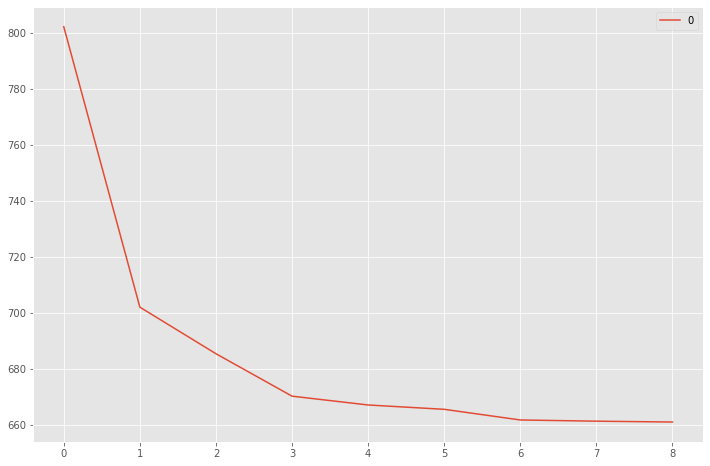

In [35]:
knn_reg(linreg_df2)

In [79]:
results['KNN'] = [661.86, 0.979]
results['Linear Regression'] = [1251.21, 0.902]

In [95]:
# df = df[(df['y'] < 30) & (df['z']<30)]
# df = df.drop('depth', axis=1)

<a id=poly></a>
## 3.3. Polynomial Regression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = df.copy()

In [91]:
X_poly, y_poly, X_train_poly, X_test_poly, y_train_poly, y_test_poly = splitting(poly_df)

If we have collinearity, let's try ridge regression.